# Import libs

In [114]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Load data

In [ ]:
data = pd.read_csv('data/Hitters.csv')
data

## a) Cleaning salary

In [11]:
data_a1 = data.dropna(axis=0, subset=['Salary'])
data_a2 = data_a1.copy()
data_a2['Salary'] = np.log(data_a2['Salary'])

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,6.551080,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,6.774224,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,5.953243,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,6.866933,A


In [38]:
data_a2.drop(['League', 'Division', 'NewLeague'], axis=1, inplace=True)

In [35]:
print(data_a2['League'].unique())
print(data_a2['Division'].unique())
print(data_a2['NewLeague'].unique())

['N' 'A']
['W' 'E']
['N' 'A']


## b) Splitting the data

In [39]:
train_set = data_a2[200:]
test_set = data_a2[:200]

## c and d) shrinkage vs MSE

In [66]:
def mse(y1, y2):
  return (y1 - y2).dot(y1 - y2) / y1.shape[0]

In [40]:
train_X = train_set.drop('Salary', axis=1)
train_y = train_set['Salary']
test_X = test_set.drop('Salary', axis=1)
test_y = test_set['Salary']

In [93]:
lr = []
scs_tr = []
scs_tr2 = []
scs_te = []

# Reduce value to avoid accedentally calling this it takes long time
# steps = 300
steps = 300
for i in range(1, steps):
  model = GradientBoostingRegressor(learning_rate=i/steps,
                                    n_estimators=10,
                                    random_state=12141550)
  model.fit(train_X, train_y)
  # sc_te = model.score(test_X, test_y)
  lr.append(i/steps)
  scs_tr.append(mse(model.predict(train_X), train_y))
  scs_te.append(mse(model.predict(test_X), test_y))
  # scs_tr2.append(mse(model.predict(test_X), test_y))

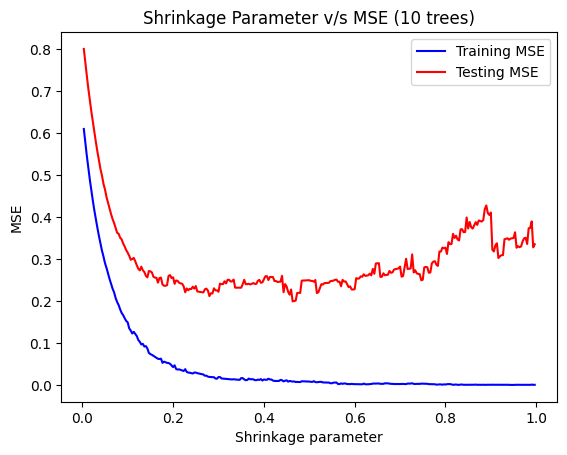

In [95]:
if (True):
  plt.plot(lr, scs_tr, 'b')
  # plt.plot(lr, scs_tr2, 'g')
  plt.plot(lr, scs_te, 'r')
  plt.xlabel('Shrinkage parameter')
  plt.ylabel('MSE')
  plt.title('Shrinkage Parameter v/s MSE (10 trees)')
  plt.legend(['Training MSE', 'Testing MSE'])
  # plt.savefig('CH8_10_c_d_10_trees.png')
  plt.show()

e) Linear regression and 

In [104]:
model = GradientBoostingRegressor(learning_rate=.1,
                                  n_estimators=1000,
                                  random_state=12141550)
model.fit(train_X, train_y)
pr_y = model.predict(test_X)
mse(pr_y, test_y)

0.2166458909513571

In [105]:
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)
pr_y = lin_reg.predict(test_X)
mse(pr_y, test_y)

0.5845167292528659

In [106]:
# Chapter 6 approach here

## e) Most important variable

In [117]:
feat_imp = np.c_[model.feature_names_in_, model.feature_importances_]
print(model.feature_importances_.max())
print(feat_imp)

0.4741352419225115
[['AtBat' 0.04469669259129561]
 ['Hits' 0.030780377574808837]
 ['HmRun' 0.057252457970593085]
 ['Runs' 0.013740825770613049]
 ['RBI' 0.023039407175099842]
 ['Walks' 0.015398445889377697]
 ['Years' 0.051626089515236694]
 ['CAtBat' 0.018963843252525137]
 ['CHits' 0.12748878521153162]
 ['CHmRun' 0.003533149380531624]
 ['CRuns' 0.4741352419225115]
 ['CRBI' 0.056855242947155]
 ['CWalks' 0.03763659464946915]
 ['PutOuts' 0.016892129040041438]
 ['Assists' 0.021112951872185273]
 ['Errors' 0.006847765237024516]]


The most important features are CRuns and CHits

## (g) Bagging

In [118]:
bag_reg = BaggingRegressor(n_estimators=1000,
                           bootstrap=True,
                           n_jobs=4,
                           random_state=12141550)
bag_reg.fit(train_X, train_y)
pr_y = bag_reg.predict(test_X)
mse(pr_y, test_y)

0.19848843332226912